In [6]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A4/cs3220_A4_src' #@param {type: "string"}
sys.path.append(path)

1. Generate a random maze with size (7,7), as a Numpy matrix, which includes 25% of occupied cells (walls).

In [ ]:
import numpy as np 
import math
import random
size = (7,7)
mazeRand = np.random.choice([0,1], size=size, p=[0.25, 0.75]) #0 = wall
mazeRand

array([[1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 1]])

2. Build the maze state space

[[1 1 0 1 0 1 1]
 [1 1 0 1 0 1 0]
 [1 1 1 1 1 0 1]
 [1 1 0 1 1 1 0]
 [1 1 0 1 1 1 1]
 [0 1 1 1 0 1 0]
 [1 1 1 0 0 0 1]]


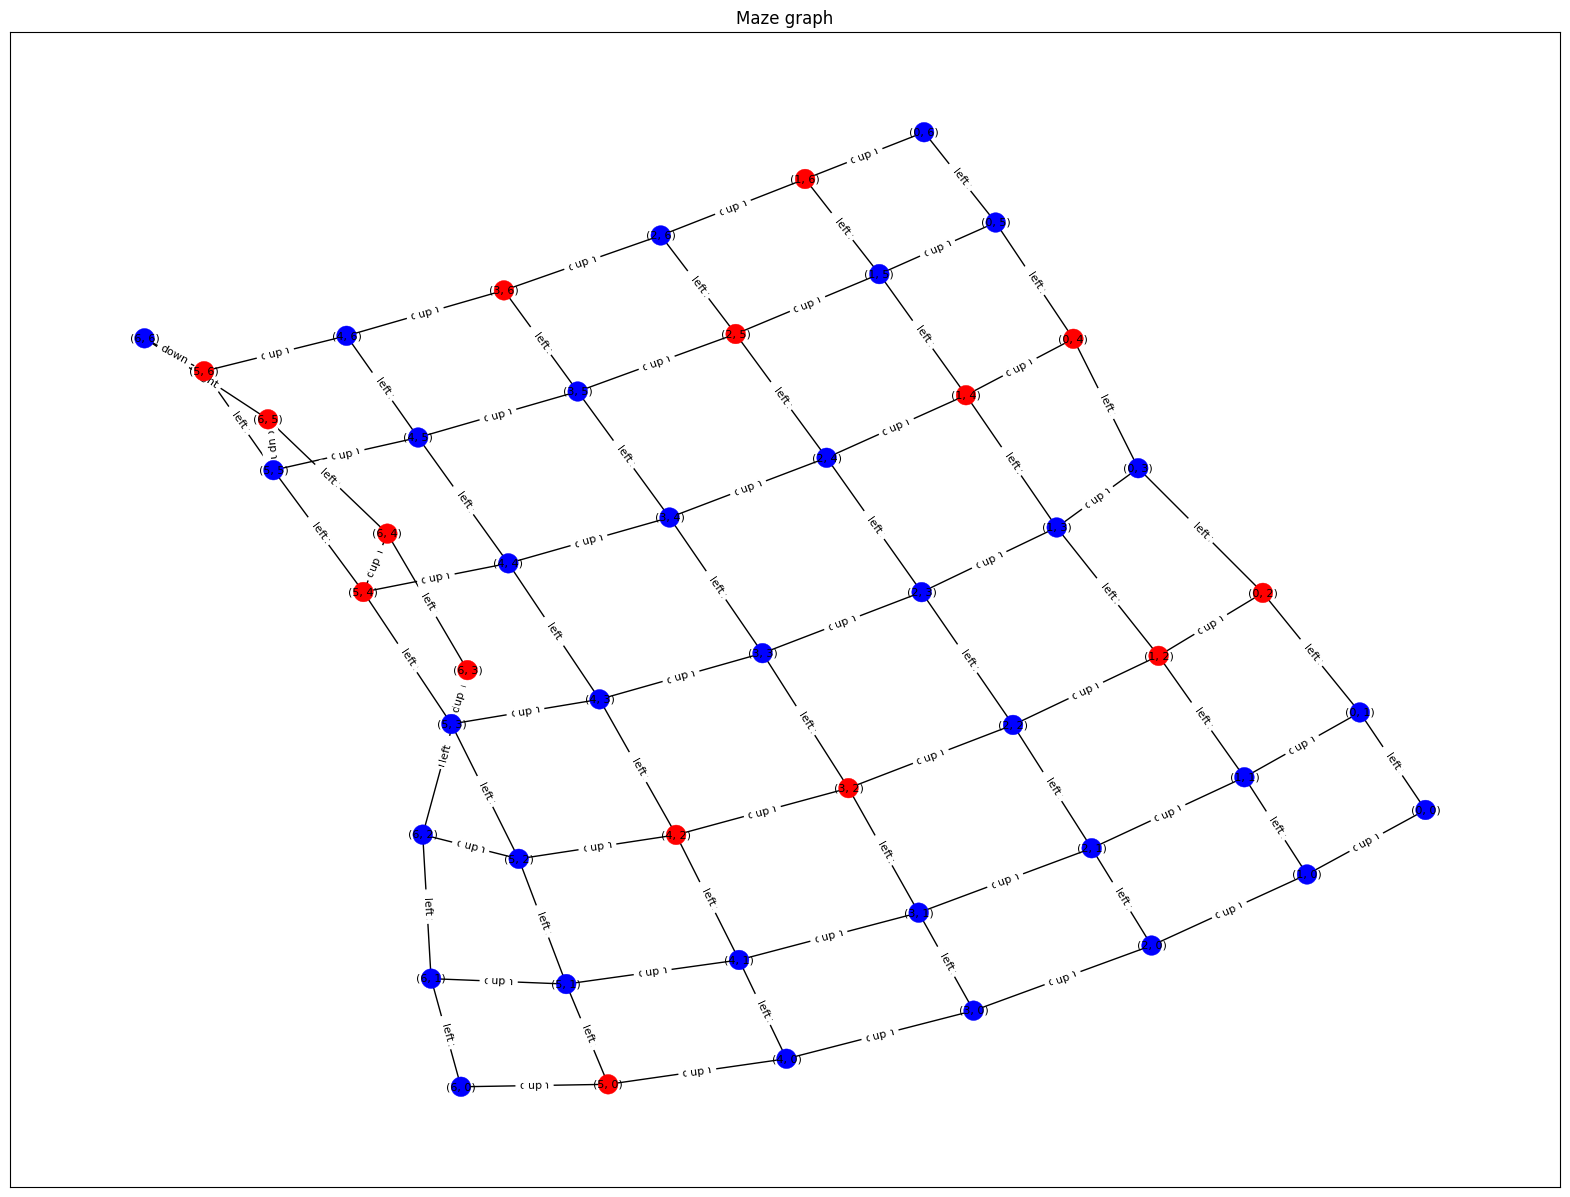

In [8]:
from mazeData import *
from mazeGraphClass import mazeGraph
from visualizations import simple_visualization

mazeActs=defineMazeActions(mazeRand)
maze=makeMazeTransformationModel(mazeActs)
res=mazeStatesLocations(7)
mazeWorldGraph=mazeGraph(maze, mazeStatesLocations(7))
simple_visualization(mazeWorldGraph, mazeRand)

[[1 1 0 1 0 1 1]
 [1 1 0 1 0 1 0]
 [1 1 1 1 1 0 1]
 [1 1 0 1 1 1 0]
 [1 1 0 1 1 1 1]
 [0 1 1 1 0 1 0]
 [1 1 1 0 0 0 1]]
32
[(0, 0), (0, 1), (0, 3), (0, 5), (0, 6), (1, 0), (1, 1), (1, 3), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 5), (6, 0), (6, 1), (6, 2)]
78 32


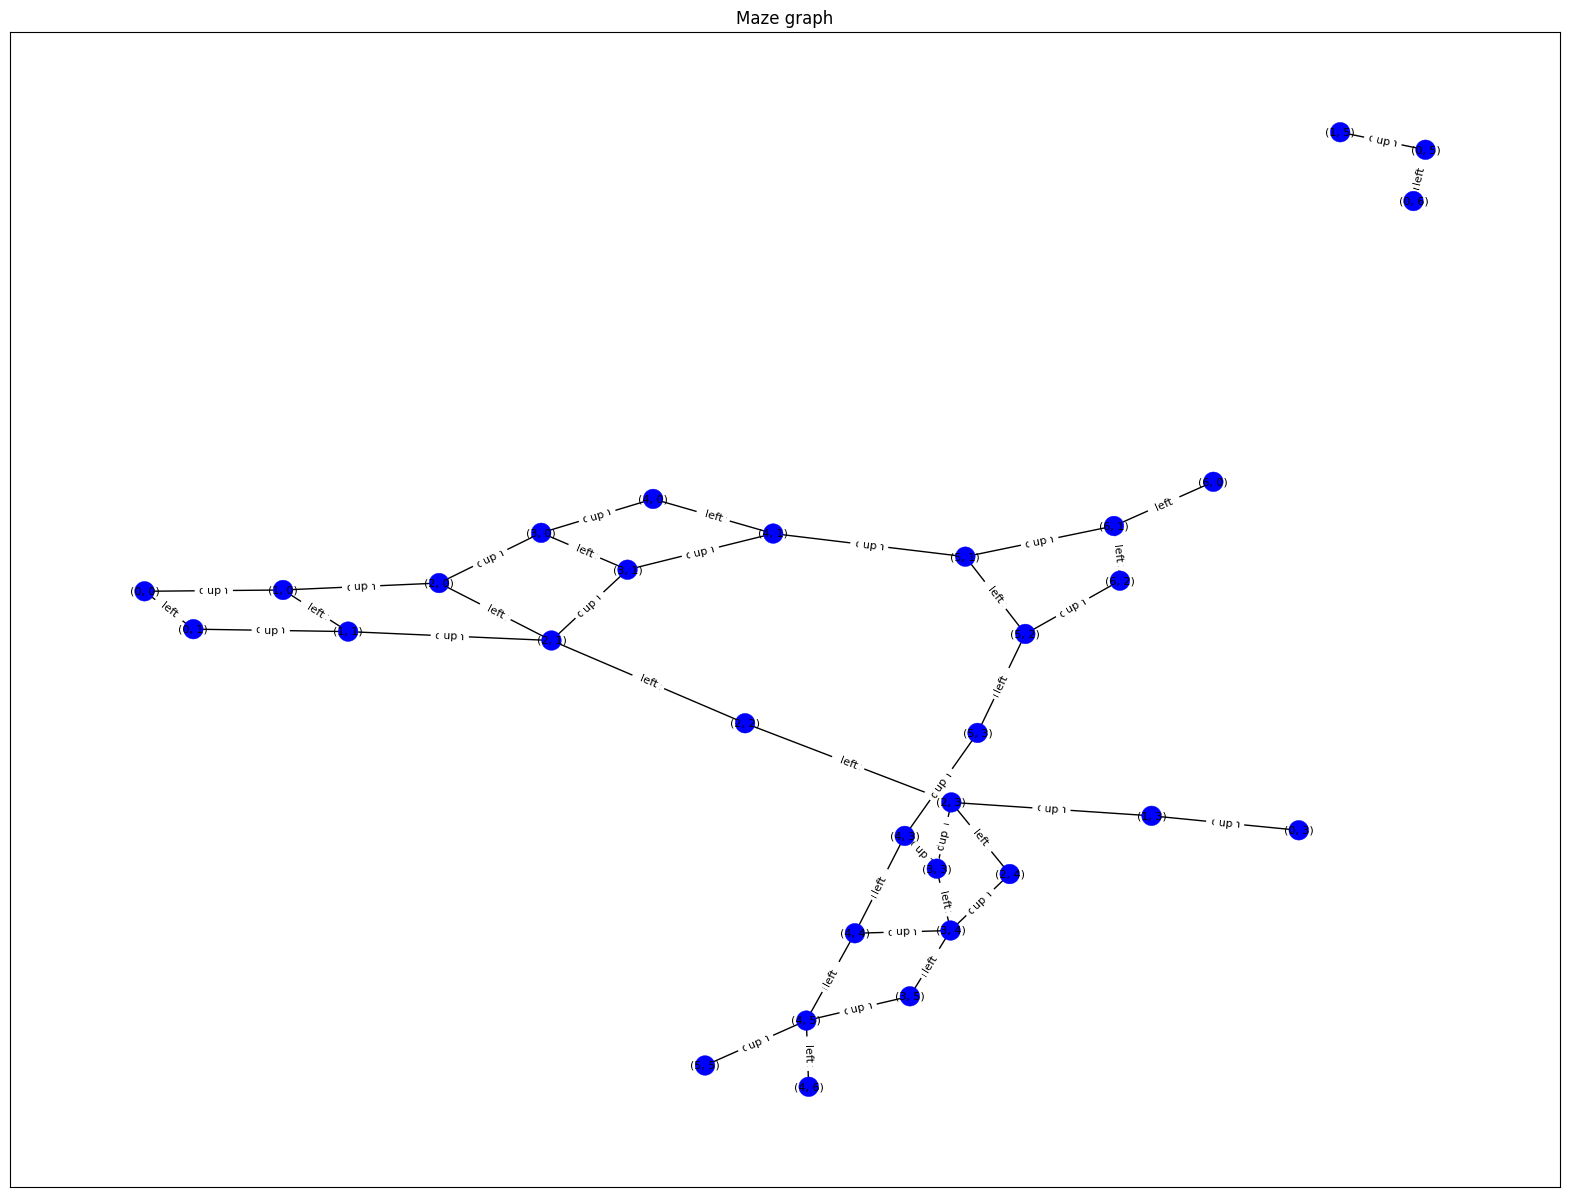

In [12]:
from visualizations import simple_visualization1
mazeAvailableActs=defineMazeAvailableActions(mazeRand)
maze1=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph1=mazeGraph(maze1, mazeStatesLocations(7))
simple_visualization1(mazeWorldGraph1, mazeRand)

3. Develop transition model where:
- The Rat-Agent is allowed to move only on free cells by using the following actions: *left, up, right, down*.
- Since the Maze is 7-story building different actions have different costs: left/right: -2 (from Agent's performance); down:-1; up:-4.

In [ ]:
def makeMazeTransformationModel(mazeActs):
    mazeStateSpace={}
    for key in mazeActs:
      for action in mazeActs[key]:
        if action=='left':
          x=key[0]
          y=key[1]-1
          mazeStateSpace.setdefault(key,{})[action]=(x,y)
        elif action=='up':
          x=key[0]-1
          y=key[1]
          mazeStateSpace.setdefault(key,{})[action]=(x,y)
        elif action=='right':
          x=key[0]
          y=key[1]+1
          mazeStateSpace.setdefault(key,{})[action]=(x,y)
        elif action=='down':
          x=key[0]+1
          y=key[1]
          mazeStateSpace.setdefault(key,{})[action]=(x,y)
      if len(mazeActs[key])==0:
        mazeStateSpace.setdefault(key,{})

    return mazeStateSpace